In [2]:
"""Process comparison of healthy and impaired for PLOS."""
import os
import argparse
import sys
sys.path.append('..')
from bayescmd.results_handling import comparison_kde_plot
from bayescmd.results_handling import data_import
from bayescmd.abc import import_actual_data
from bayescmd.abc import priors_creator
from bayescmd.util import findBaseDir
import json
from distutils import dir_util

BASEDIR = os.path.abspath(findBaseDir('BayesCMD'))

STARTING AT: /home/buck06191/repos/GitHub/BayesCMD/bayescmd
 Looking for: BayesCMD
STARTING AT: /home/buck06191/repos/GitHub/BayesCMD/bayescmd
 Looking for: BayesCMD
STARTING AT: /home/buck06191/repos/GitHub/BayesCMD/bayescmd
 Looking for: BayesCMD
STARTING AT: /home/buck06191/repos/GitHub/BayesCMD/bayescmd
 Looking for: BayesCMD


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
healthy_Dir = "/home/buck06191/Dropbox/phd/PLOS_paper/data/parameters/healthy/wide_params/NRMSE_SA"
impaired_Dir = "/home/buck06191/Dropbox/phd/PLOS_paper/data/parameters/impaired/wide_params/NRMSE_SA"
healthy_pfile = os.path.abspath(os.path.join(healthy_Dir, 'all_parameters.csv'))
impaired_pfile = os.path.abspath(os.path.join(impaired_Dir, 'all_parameters.csv'))

config_file="../examples/configuration_files/varying_parameter_wide_config.json"
with open(config_file, 'r') as conf_f:
    conf = json.load(conf_f)
params = conf['priors']

input_path = os.path.join(BASEDIR,
                          'PLOS_paper',
                          'data',
                          'simulated_smooth_combined_ABP.csv')

d0 = import_actual_data(input_path)

targets = conf['targets']
model_name = conf['model_name']
inputs = conf['inputs']

config = {
    "model_name": model_name,
    "targets": targets,
    "inputs": inputs,
    "parameters": params,
    "input_path": input_path,
    "zero_flag": {k: False for k in targets}
}

results_healthy = data_import(healthy_pfile)
results_impaired = data_import(impaired_pfile)

Number of lines:	999000
Number of NaN values:	0
Number of lines:	999000
Number of NaN values:	0


In [42]:
%matplotlib inline
check_dict = {}
summed_NRMSE = 0
summed_check = 0
vector = []
for sig in ['CCO', 'Vmca', 'TOI']:
    healthy_rng = max(d0[sig]) - min(d0[sig])
    print(healthy_rng)
    n = len(d0[sig])
    select_df = results_healthy[results_healthy['{}_euclidean'.format(sig)]!=100000]
    check_dict[sig] = (1./healthy_rng * 1/np.sqrt(n) * select_df['{}_euclidean'.format(sig)]).values#(1./healthy_rng * np.sqrt((select_df['{}_euclidean'.format(sig)]**2)/n)).values
    summed_check += (1./healthy_rng * 1/np.sqrt(n) *  select_df['{}_euclidean'.format(sig)]).values#(np.sqrt((select_df['{}_euclidean'.format(sig)]**2)/n)/healthy_rng).values
    summed_NRMSE += select_df['{}_NRMSE'.format(sig)].values
    vector.append(1/healthy_rng* 1/np.sqrt(n))

0.019468425373813075
3.4277397363384523
1.8486687868466163


In [49]:
check_dict['Vmca']

array([  9.12769341,  12.68383467,  17.03724735, ...,   6.73654393,
        14.95989406,  14.9378482 ])

In [50]:
select_df['Vmca_euclidean'] * vector[1]

idx
3       9.127693
4      12.683835
8      17.037247
9      17.083133
15      4.523746
18     12.806764
23     15.271427
25     18.074374
30      9.932016
35     10.404154
37      4.240985
39     17.588774
42      9.345346
43      9.711800
45      8.856438
46     18.044713
47      3.990948
48      9.455633
51      9.652210
52      4.523882
53      9.351346
54     18.205578
57     16.691971
58      7.349552
59     10.270870
60      3.740474
61     24.528936
63     14.318751
67     17.758326
68     18.255637
         ...    
950    17.215444
952    12.311609
953    17.643511
954    13.738548
955    15.206565
956    13.918074
958    11.200479
959     2.706667
962    12.885292
963     6.476238
964    14.359249
966     6.059149
967    17.673459
968     3.933551
970    22.852726
973    12.882245
975     9.771776
977     6.247298
980    18.241593
981     8.876808
982    16.433808
984     4.867798
985    15.314958
986     2.383855
987     7.411631
988     5.298930
989     1.555592
992     6.

In [44]:
summed_check

array([  36.08670767,   68.39685925,  372.3854225 , ...,  137.03882271,
        408.16243597,  288.51318398])

In [45]:
summed_check/summed_NRMSE

array([ 1.,  1.,  1., ...,  1.,  1.,  1.])

In [66]:
select_df[['NRMSE', 'k_aut']]

NRMSE     k_aut
idx                      
3     36.086708  0.792262
4     68.396859  0.746051
8    372.385422  0.803607
9    390.216747  0.548599
15    98.381357  0.574499
18    23.305006  0.520139
23   197.343276  0.373401
25   153.516272  0.484310
30   252.592075  0.646275
35    28.181567  0.424916
37    36.182387  0.336770
39   145.263882  0.427251
42   153.953407  0.653389
43   215.998524  0.750564
45   161.528422  0.355914
46   272.527662  0.954221
47    98.727706  0.323853
48    50.752747  0.522700
51   218.065309  0.580164
52    15.685928  0.787879
53   217.292037  0.956780
54   158.775519  0.913127
57   196.211418  0.556747
58    70.513206  0.497616
59   123.043733  0.647583
60   293.114896  0.647918
61   222.730475  0.573299
63    79.919436  0.626379
67   155.011063  0.658264
68   187.638856  0.522413
..          ...       ...
950  246.528396  0.989051
952   99.022269  0.664980
953  277.418983  0.458408
954  252.671544  0.578334
955  188.488604  0.989470
956  140.745713  0.751977
958  277.491598  0.347595
959  113.642771  0.532976
962   52.609305  0.404613
963  195.925218  0.619248
964   62.537656  0.485262
966   20.447525  0.589313
967  185.153194  0.962074
968  158.920333  0.586694
970   82.660653  0.836163
973  118.136605  0.343827
975  124.606030  0.396137
977  174.423266  0.402809
980  185.162942  0.464273
981   48.206435  0.948551
982  292.591192  0.385568
984  177.594211  0.956641
985  155.314244  0.477173
986  197.749906  0.640505
987  134.968362  0.488403
988  114.891300  0.426638
989   90.110030  0.483236
992  137.038823  0.429953
995  408.162436  0.967233
998  288.513184  0.381915

[584877 rows x 2 columns]

In [52]:
vector

[1.148561290687391, 0.0065234473720235855, 0.012095557589382914]

In [56]:
euc_mat = select_df[['{}_euclidean'.format(s) for s in ['CCO', 'Vmca', 'TOI']]].values

In [60]:
np.dot(euc_mat, vector)

array([  36.08670767,   68.39685925,  372.3854225 , ...,  137.03882271,
        408.16243597,  288.51318398])

In [58]:
NRMSE_mat = select_df[['{}_NRMSE'.format(s) for s in ['CCO', 'Vmca', 'TOI']]].values

In [61]:
np.sum(NRMSE_mat, axis=1)

array([  36.08670767,   68.39685925,  372.3854225 , ...,  137.03882271,
        408.16243597,  288.51318398])

In [ ]:
euc_index=select_df['euclidean'].sort_values().index

In [61]:
nrmse_index=select_df['NRMSE'].sort_values().index

In [5]:
results_impaired.columns

Index(['r_m', 'v_pn', 'sigma_coll', 'p_tot', 'r_t', 'Vol_mit', 'cytox_tot_tis',
       'r_0', 'v_cn', 'T_max0', 'Xtot', 'Dp_n', 'a_n', 'K_sigma', 'R_autp',
       'K_G', 'k_aut', 'euclidean', 'manhattan', 'MSE', 'RMSE', 'NRMSE', 'MAE',
       'Vmca_euclidean', 'Vmca_manhattan', 'Vmca_MSE', 'Vmca_RMSE',
       'Vmca_NRMSE', 'Vmca_MAE', 'CCO_euclidean', 'CCO_manhattan', 'CCO_MSE',
       'CCO_RMSE', 'CCO_NRMSE', 'CCO_MAE', 'TOI_euclidean', 'TOI_manhattan',
       'TOI_MSE', 'TOI_RMSE', 'TOI_NRMSE', 'TOI_MAE', 'ix', 'Batch'],
      dtype='object')

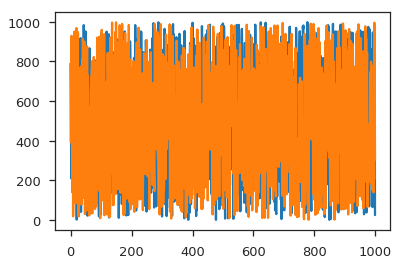

In [63]:
fig, ax = plt.subplots(1)
ax.plot(range(1000), euc_index[:1000], label='euclidean')
ax.plot(range(1000), nrmse_index[:1000], label='nrmse')


In [6]:
results = pd.concat([results_healthy, results_impaired])

In [7]:
ar_state = ['Healthy'] * results_healthy.shape[0]
ar_state.extend(['Impaired'] * results_healthy.shape[0])
results['Autoregulatory State'] = ar_state
results['Autoregulatory State'] = results['Autoregulatory State'].astype('category')

In [8]:
results.columns

Index(['r_m', 'v_pn', 'sigma_coll', 'p_tot', 'r_t', 'Vol_mit', 'cytox_tot_tis',
       'r_0', 'v_cn', 'T_max0', 'Xtot', 'Dp_n', 'a_n', 'K_sigma', 'R_autp',
       'K_G', 'k_aut', 'euclidean', 'manhattan', 'MSE', 'RMSE', 'NRMSE', 'MAE',
       'Vmca_euclidean', 'Vmca_manhattan', 'Vmca_MSE', 'Vmca_RMSE',
       'Vmca_NRMSE', 'Vmca_MAE', 'CCO_euclidean', 'CCO_manhattan', 'CCO_MSE',
       'CCO_RMSE', 'CCO_NRMSE', 'CCO_MAE', 'TOI_euclidean', 'TOI_manhattan',
       'TOI_MSE', 'TOI_RMSE', 'TOI_NRMSE', 'TOI_MAE', 'ix', 'Batch',
       'Autoregulatory State'],
      dtype='object')

In [9]:
d = "NRMSE"
figPath = "/home/buck06191/Dropbox/phd/Bayesian_fitting/{}/{}/{}/"\
    "Figures/{}".format(model_name, 'PLOS_paper', 'Comparison', d)

dir_util.mkpath(figPath)

lim = 1000
limit = lim
groups = results['Autoregulatory State'].unique()
acceptance_param=1
group_names= groups

In [10]:
df_list = [results_healthy, results_impaired]
p_names = list(params.keys())

kde_dfs = []
for ii, df in enumerate(df_list):
    sorted_df = df.sort_values(by=d)

    if limit:
        accepted_limit = limit
    elif frac:
        accepted_limit = frac_calculator(sorted_df, frac)
    else:
        raise ValueError('No limit or fraction given.')

    sorted_df['Accepted'] = np.zeros(len(sorted_df))
    sorted_df['Accepted'].iloc[:accepted_limit] = 1
    sorted_df.loc[:, 'Accepted'][sorted_df[d] == 100000] = 2

    kde_dfs.append(sorted_df.loc[(sorted_df['Accepted'] == acceptance_param), :])
    kde_dfs[ii]['Group'] = [ii] * accepted_limit

kde_df = pd.concat(kde_dfs)

if group_names:
    kde_df['Group']= kde_df['Group'].map(lambda x: "{}".format(group_names[x]))
groups = kde_df['Group'].unique()
colors = sns.color_palette("hls", len(groups))
color_pal = dict(zip(groups, colors))


/home/buck06191/.virtualenvs/python3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/home/buck06191/.virtualenvs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/buck06191/.virtualenvs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

In [11]:
%matplotlib inline
# g = sns.PairGrid(
#             kde_df,
#             vars=p_names,
#             hue="Group",
#             hue_kws={"cmap":['Blues', 'Reds']},
#             palette=color_pal,
#             diag_sharey=False)
# g.map_diag(sns.distplot)
# g.map_lower(sns.kdeplot)


/home/buck06191/.virtualenvs/python3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
../bayescmd/results_handling.py:732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  sorted_df.loc[:, 'Accepted'][sorted_df[d] == 100000] = 2
../bayescmd/results_handling.py:736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  kde_dfs[ii]['Group'] = [ii]

{'Healthy': 'b', 'Impaired': 'r'}
['Blues', 'Reds']


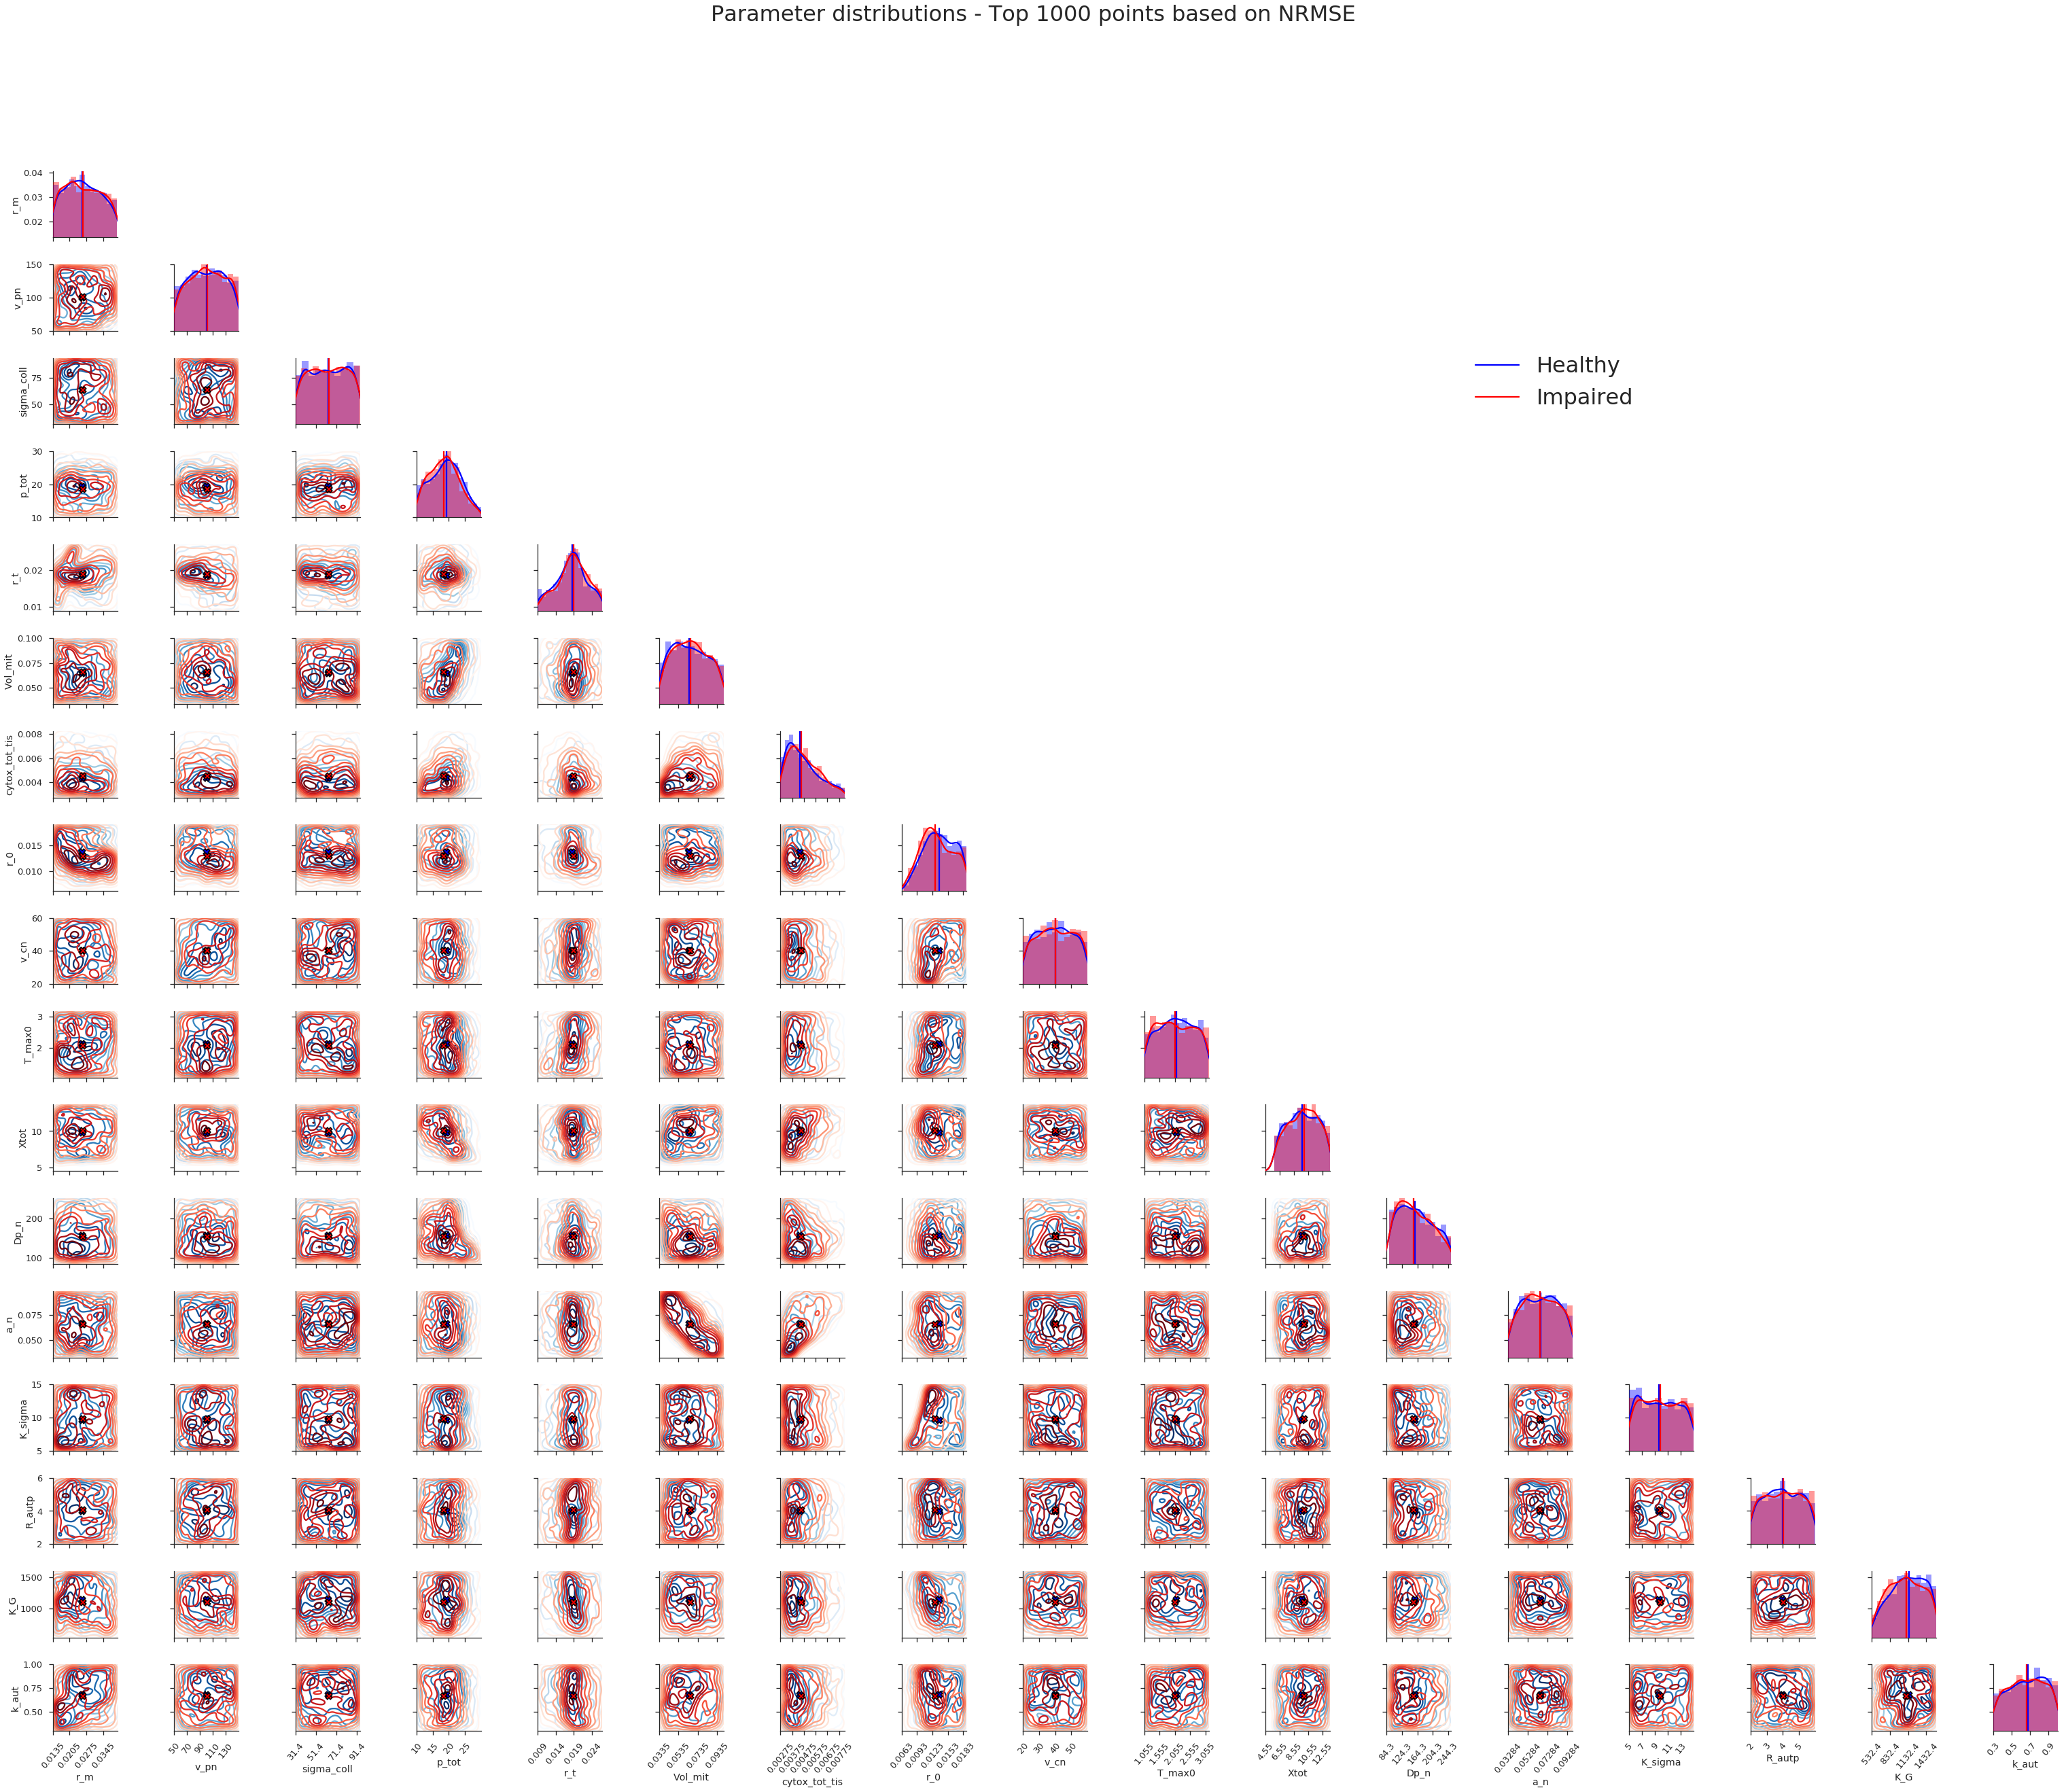

In [12]:
comparison_kde_plot(df_list, params, group_names=list(groups), limit=lim, n_ticks=4, d=d,
                 median_file=os.path.join(figPath, "medians.txt"))